<a href="https://colab.research.google.com/github/nurgulbagit/Data-Science-projects/blob/main/ds01_Diabetes_and_Decision_Trees_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Supervised Learning

Note: this is shared ``read-only`` so you should save a copy to your own Google Drive.

Diabetes is one of the leading causes of death world wide (8th in the USA). Key problems are early and correct diagnosis.

For us it's an excuse to learn a few Python commands, and have a first look at the basics of **supervised learning**.

1.  A basic intro to Python and scikit-learn
2.  The cardinal rule: always look at your data set, in any way you can.
3.  Decision Tree Classifiers
34.  Training and testing error


Data from "National Institute of Diabetes and Digestive and Kidney Diseases" available here:

https://www.kaggle.com/datasets/mathchi/diabetes-data-set/data

<img src="https://www.aces.edu/wp-content/uploads/2022/03/FCS-2561-DEEP-Diabetes-Complications-Flyer081621L.jpg" width=250px/>


# Important Python Libraries

* sklearn
* Pandas
* Numpy
* Matplotlib

In [ ]:
# import important python libraries
import pandas as pd # used for data manipulation and analysis.
import numpy as np # used for numerical computations.
import matplotlib.pyplot as plt # used for data visualization.


In [ ]:
# sets the seed for NumPy's random number generator to a specific value, in this case, 42
# running code always gets same random numbers -- useful for debugging and verifying results.
np.random.seed(42)

## Load the Data

* Download the data from [this link](https://drive.google.com/file/d/1tq0aqY1Bdz3n2qc3IA0lf7o3QWgb6bXX/view?usp=sharing).
* Save in your Google Drive.

* Now let's give Colab access to our Drive

In [ ]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read in the Data


In [ ]:
# Replace 'path_to_your_file.csv' with the actual path to your CSV file
#file_path = '/content/drive/MyDrive/Colab Notebooks/path_to_your_file.csv'

file_path = '/content/drive/MyDrive/Colab Notebooks/YouTube-Data-Sets/diabetes.csv'
diabetes_data = pd.read_csv(file_path) #reads the CSV file located at file_path,
                                       #loads the data into a Pandas DataFrame
                                       #and assigns it to the variable diabetes_data.

### Always look at the data

First cardinal rule...

In [ ]:
# Display the first few rows of the dataframe
pd.set_option('display.min_rows', 15)

print(diabetes_data.shape) # displays the number of rows and columns of the array
diabetes_data # prints the actual data

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0


## What did we learn?

We have 768 rows (patients), each with 8 features:

* Pregnancies
* Glucose
* Blood Pressure
* Skin Thickness
* Insulin
* BMI
* Diabetes Pedigree Function
* Age

The 9th column is our **target**.

### What else can we learn?

1. Balanced dataset? How many have diabetes?
2. Let's plot subset of the columns (2 at a time). Need to learn how to do scatter plots.
3. Other ideas we could do?

In [ ]:
diabetes_data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


### plot 2 columns

In [ ]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
X = diabetes_data[['Glucose', 'BMI']].values
y = diabetes_data['Outcome'].values


In [ ]:
X

array([[148. ,  33.6],
       [ 85. ,  26.6],
       [183. ,  23.3],
       ...,
       [121. ,  26.2],
       [126. ,  30.1],
       [ 93. ,  30.4]])

# let's plot these values using matplotlib

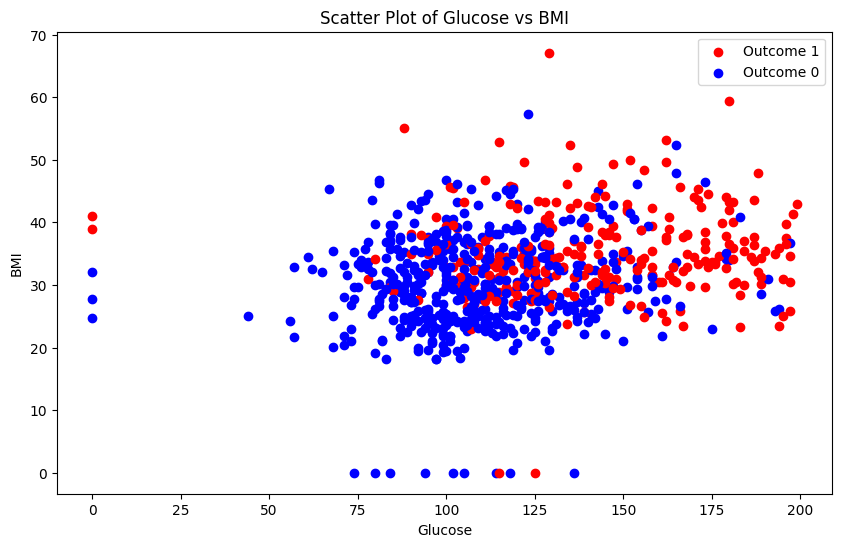

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6)) #This function creates a new figure, which is a container for all the plot elements and sets the width of the figure to 10 inches and the height to 6 inches
for i in range(len(X)): #from 1 to 768 which is the length of the array
    if y[i] == 0: #if outcome is 0
        plt.scatter(X[i, 0], X[i, 1], color='blue', label='Outcome 0' if 'Outcome 0' not in plt.gca().get_legend_handles_labels()[1] else "")
    else: #if outcome is 1
        plt.scatter(X[i, 0], X[i, 1], color='red', label='Outcome 1' if 'Outcome 1' not in plt.gca().get_legend_handles_labels()[1] else "")

# Adding labels and title
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Scatter Plot of Glucose vs BMI')
plt.legend()
plt.show() # plot current figure to screen


In [ ]:
filtered_data = diabetes_data[(diabetes_data['Glucose'] != 0) & (diabetes_data['BMI'] != 0)]
X = filtered_data[['Glucose', 'BMI']].values
y = filtered_data['Outcome'].values


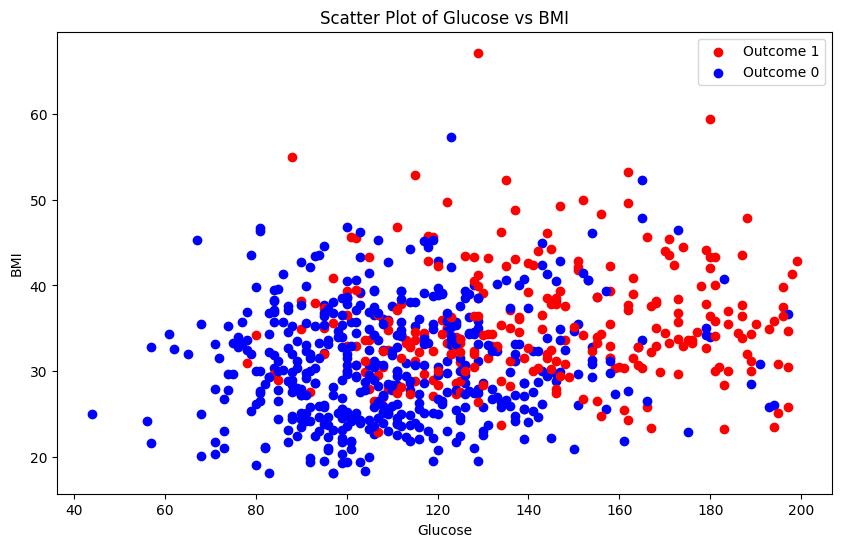

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6)) #This function creates a new figure, which is a container for all the plot elements and sets the width of the figure to 10 inches and the height to 6 inches
for i in range(len(X)): #from 1 to 768 which is the length of the array
    if y[i] == 0: #if outcome is 0
        plt.scatter(X[i, 0], X[i, 1], color='blue', label='Outcome 0' if 'Outcome 0' not in plt.gca().get_legend_handles_labels()[1] else "")
    else: #if outcome is 1
        plt.scatter(X[i, 0], X[i, 1], color='red', label='Outcome 1' if 'Outcome 1' not in plt.gca().get_legend_handles_labels()[1] else "")

# Adding labels and title
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Scatter Plot of Glucose vs BMI')
plt.legend()
plt.show() # plot current figure to screen


## Training a decision tree

Basic paradigm of building a model and training:
```
model = FamilyOfModels(some parameters)
model.fit(X,y)
model.predict(x)
```

Then we can compute the accuracy

In [ ]:
# import the necessary libraries
from sklearn import tree #import the tree module from the scikit-learn library
from sklearn.tree import DecisionTreeClassifier # used to create a decision tree classifier
from sklearn.metrics import accuracy_score # used to calculate the accuracy of a classification model

## To Do

1. Train depth 1 tree
2. Compute predictions and accuracy
3. Visualize the partition region

In [ ]:
decision_stump = DecisionTreeClassifier(max_depth=1)


In [ ]:
decision_stump.fit(X,y)

DecisionTreeClassifier(max_depth=1)

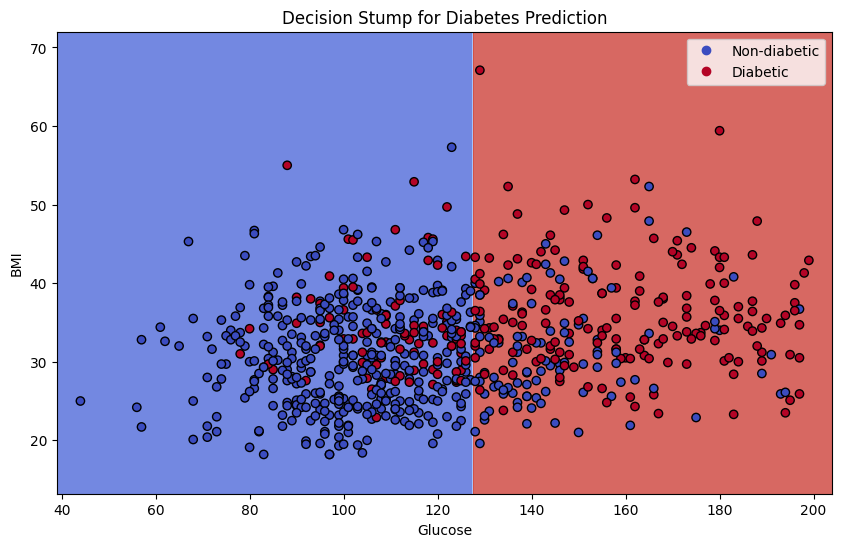

In [ ]:
# Define the grid range based on your data
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Predict the outcome on the meshgrid
Z = decision_stump.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Decision Stump for Diabetes Prediction')
plt.legend(handles=scatter.legend_elements()[0], labels=['Non-diabetic', 'Diabetic'])
plt.show()


[Text(0.5, 0.75, 'x[0] <= 127.5\ngini = 0.456\nsamples = 752\nvalue = [488, 264]'),
 Text(0.25, 0.25, 'gini = 0.31\nsamples = 470\nvalue = [380, 90]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.473\nsamples = 282\nvalue = [108, 174]'),
 Text(0.625, 0.5, '  False')]

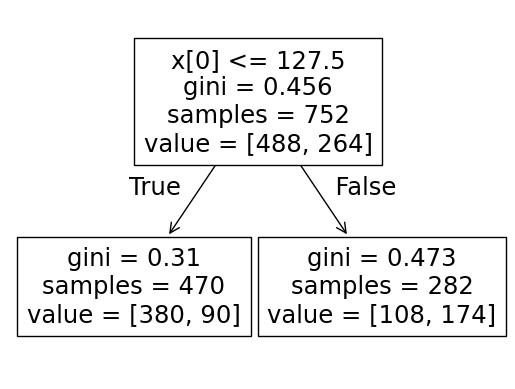

In [ ]:
tree.plot_tree(decision_stump)

In [ ]:
# What's the accuracy?

y_pred = decision_stump.predict(X)
accuracy_score(y, y_pred)

0.7367021276595744

### Try with a depth 2 tree

In [ ]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X,y)
y_pred2 = model.predict(X)
accuracy_score(y, y_pred2)

0.773936170212766

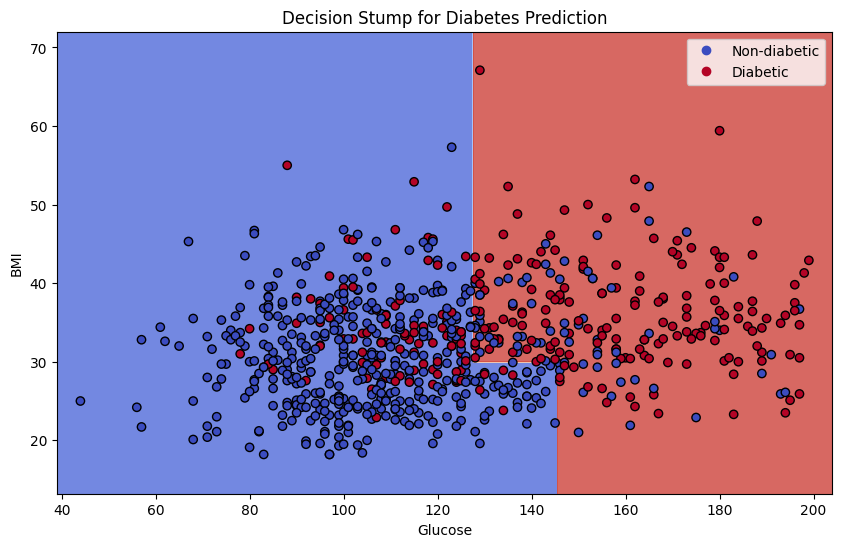

In [ ]:
# Define the grid range based on your data
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Predict the outcome on the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Decision Stump for Diabetes Prediction')
plt.legend(handles=scatter.legend_elements()[0], labels=['Non-diabetic', 'Diabetic'])
plt.show()


In [ ]:
model = DecisionTreeClassifier(max_depth=15)
model.fit(X,y)
y_pred2 = model.predict(X)
accuracy_score(y, y_pred2)

0.9680851063829787

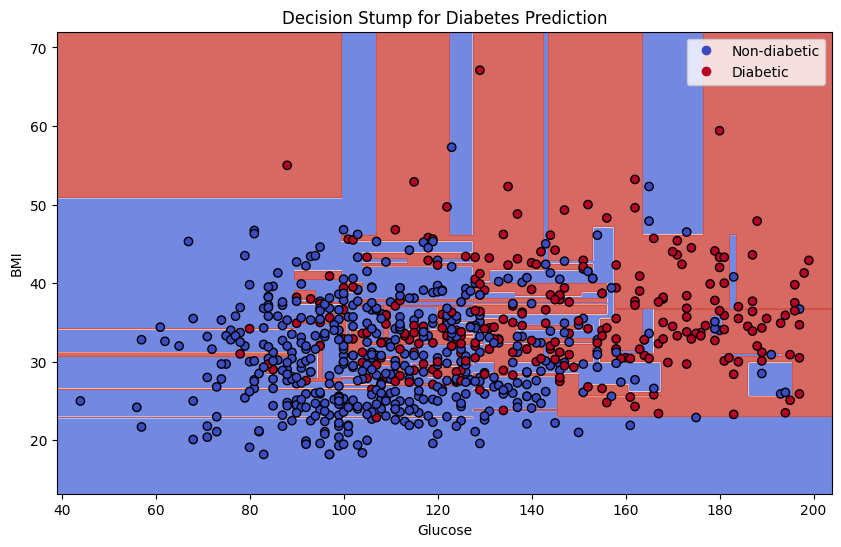

In [ ]:
# Define the grid range based on your data
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
# Predict the outcome on the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot the training points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Decision Stump for Diabetes Prediction')
plt.legend(handles=scatter.legend_elements()[0], labels=['Non-diabetic', 'Diabetic'])
plt.show()


### Let's try some other models

1. Logistic regression (will learn what this is)
```
from sklearn.linear_model import LogisticRegression
```
2. XGBoost (will learn what this is)
```
from xgboost import XGBClassifier
```

# Split my data

In [ ]:
# split data into train and test
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Question: which is better?

Depth 3 or a depth 5 decision tree?